#### imports etc

In [491]:
import pandas as pd
import matplotlib as mpl
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

# Read in the csv file for analysis
df = pd.read_csv('search_results.csv')
df.head()

,price,type,address,url,postcode,number_bedrooms,date
0,4117,3 bedroom flat,"One The Elephant, London, SE1",/property-to-rent/property-61416212.html,SE1,3.0,22/08/2016
1,1751,2 bedroom flat,Royal Drive N11,/property-to-rent/property-39989757.html,N11,2.0,22/08/2016
2,3358,2 bedroom flat,"Bramah House, Gatliff Road, Grosvenor Watersid...",/property-to-rent/property-61019774.html,SW1W,2.0,22/08/2016
3,1470,2 bedroom flat,Broxholm Road,/property-to-rent/property-50945986.html,NaN,2.0,22/08/2016
4,3430,5 bedroom house,Knollys Road,/property-to-rent/property-55287568.html,NaN,5.0,22/08/2016


## Analysis

In [492]:
# Quick look at the shape of the data.

df.describe()

,price,number_bedrooms
count,1905.000000,1893.000000
mean,2358.367979,1.885367
std,6734.719941,1.069005
min,375.000000,0.000000
25%,1400.000000,1.000000
50%,1820.000000,2.000000
75%,2492.000000,2.000000
max,285133.000000,7.000000


In [493]:
# See which 'types' do not have bedroom number extracted

df[df.number_bedrooms.isnull()].type.unique()

array(['Property', 'Flat share', 'Terraced house', 'Detached house'], dtype=object)

In [494]:
# Create a data frame with summary statistics by number of bedrooms.

df_by_bedroom = pd.DataFrame(columns = ['number_bedrooms','count','average_price'])
df_by_bedroom['number_bedrooms'] = df.number_bedrooms[df.number_bedrooms.notnull()].unique().astype(int)
df_by_bedroom.sort_values(by='number_bedrooms',inplace=True)
df_by_bedroom.reset_index(drop=True,inplace=True)
for i in range(0,len(df_by_bedroom.index),1):
    df_by_bedroom['count'].loc[i]=df[df.number_bedrooms==i].number_bedrooms.count()
    df_by_bedroom['average_price'].loc[i]=df[df.number_bedrooms==i].price.mean()

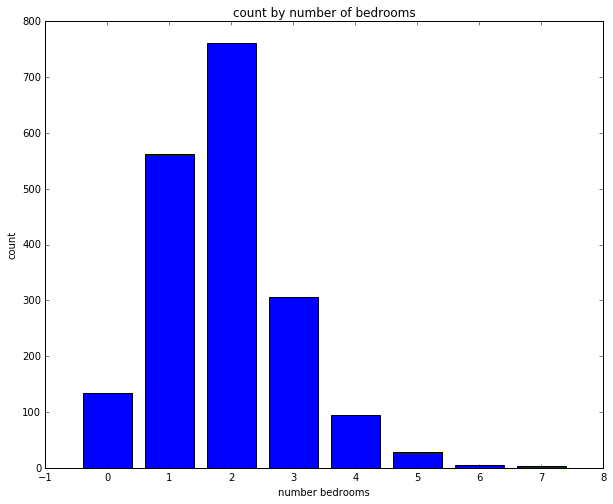

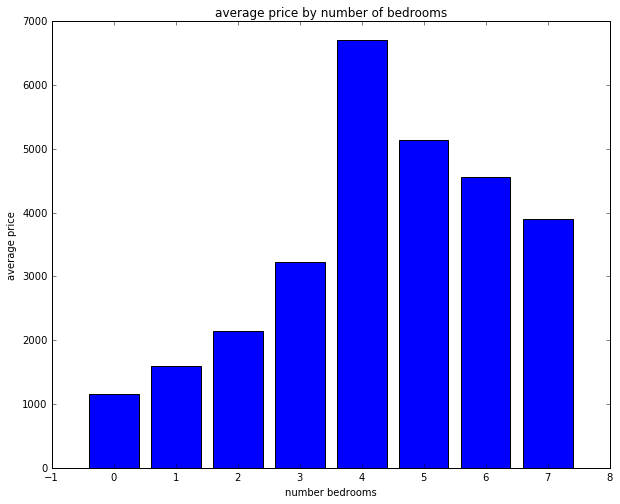

In [495]:
# Plots to visualise results by number of bedrooms.

plt.figure(num=1,figsize=(10,8))
plt.bar(df_by_bedroom['number_bedrooms'],df_by_bedroom['count'],align='center')
plt.xlabel('number bedrooms')
plt.ylabel('count')
plt.title('count by number of bedrooms')
plt.ticklabel_format(style='plain')

plt.figure(num=2,figsize=(10,8))
plt.bar(df_by_bedroom['number_bedrooms'],df_by_bedroom['average_price'],align='center')
plt.xlabel('number bedrooms')
plt.ylabel('average price')
plt.title('average price by number of bedrooms')
plt.ticklabel_format(style='plain')
plt.show()

## Using the postcode csv to find the property borough

In [496]:
# Read in the csv

london_postcodes_df = pd.read_csv('london_postcodes.csv')

In [497]:
# Tidy up column names

def Replace_Bad_Characters_in_Cols(df):
    to_replace = (" ",")","(",":","/","%","-")
    for i in to_replace:
        df.columns = df.columns.str.replace(i, "_")
Replace_Bad_Characters_in_Cols(london_postcodes_df)
london_postcodes_df.head()

,Postcode,District,Built_up_sub_division,London_Borough,Inner_Outer
0,BR1 1AA,Bromley London Boro,Bromley,Bromley,Outer
1,BR1 1AB,Bromley London Boro,Bromley,Bromley,Outer
2,BR1 1AE,Bromley London Boro,Bromley,Bromley,Outer
3,BR1 1AX,Bromley London Boro,Bromley,Bromley,Outer
4,BR1 1BA,Bromley London Boro,Bromley,Bromley,Outer


In [498]:
# Create new columns for the stem & end of the postcodes.

postcode_split = london_postcodes_df.Postcode.str.split(' ', expand=True).astype(str)
postcode_split.columns=('pc_stem','pc_end')
pc_df = pd.merge(london_postcodes_df,postcode_split,how='left',left_index=True,right_index=True)
pc_df.head()

,Postcode,District,Built_up_sub_division,London_Borough,Inner_Outer,pc_stem,pc_end
0,BR1 1AA,Bromley London Boro,Bromley,Bromley,Outer,BR1,1AA
1,BR1 1AB,Bromley London Boro,Bromley,Bromley,Outer,BR1,1AB
2,BR1 1AE,Bromley London Boro,Bromley,Bromley,Outer,BR1,1AE
3,BR1 1AX,Bromley London Boro,Bromley,Bromley,Outer,BR1,1AX
4,BR1 1BA,Bromley London Boro,Bromley,Bromley,Outer,BR1,1BA


In [499]:
# Create a pivot table of the postcode stem by how many full postcodes sit in each borough

pivot = pd.DataFrame(pd.pivot_table(pc_df,values='Postcode',index = 'pc_stem',columns='London_Borough',aggfunc='count'))
pivot.head()

London_Borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
pc_stem,,,,,,,,,,,,,,,,,,,,,
BR1,NaN,NaN,NaN,NaN,1724.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BR2,NaN,NaN,NaN,NaN,1383.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BR3,NaN,NaN,NaN,NaN,2027.0,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BR4,NaN,NaN,NaN,NaN,557.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BR5,NaN,NaN,NaN,NaN,1292.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Unfortunately many postcode stems have full postcodes in more than one borough; e.g. N1 has postcodes in both Islington and Hackney. We'll just default to whichever borough has the greatest number of postcodes for each postcode stem.

In [500]:
# Create dataframe of postcode stems & boroughs

pc_borough_lookup = pd.DataFrame(pivot.idxmax(axis=1))
pc_borough_lookup.reset_index( inplace=True)

# Merge borough column into main df

df = pd.merge(df,pc_borough_lookup,how='left',left_on='postcode',right_on='pc_stem')
df = df.rename(columns={0:'borough'})

In [510]:
df.head()

,price,type,address,url,postcode,number_bedrooms,date,pc_stem,borough
0,4117,3 bedroom flat,"One The Elephant, London, SE1",/property-to-rent/property-61416212.html,SE1,3.0,22/08/2016,SE1,Southwark
1,1751,2 bedroom flat,Royal Drive N11,/property-to-rent/property-39989757.html,N11,2.0,22/08/2016,N11,Enfield
2,3358,2 bedroom flat,"Bramah House, Gatliff Road, Grosvenor Watersid...",/property-to-rent/property-61019774.html,SW1W,2.0,22/08/2016,SW1W,Westminster
3,1470,2 bedroom flat,Broxholm Road,/property-to-rent/property-50945986.html,NaN,2.0,22/08/2016,NaN,NaN
4,3430,5 bedroom house,Knollys Road,/property-to-rent/property-55287568.html,NaN,5.0,22/08/2016,NaN,NaN


In [509]:
print 'number of records in full dataframe: ', len(df)
print 'number of records with borough data: ',len(df[df.borough.notnull()])

number of records in full dataframe:  1905
number of records with borough data:  1422


#### Focus on 1 beds by borough

In [544]:
df_1beds = df[ (df['borough'].notnull()) & (df['number_bedrooms']==1.0)]
df_1beds.head()

,price,type,address,url,postcode,number_bedrooms,date,pc_stem,borough
12,1200,1 bedroom apartment,"Village Road, London, EN1",/property-to-rent/property-60974501.html,EN1,1.0,22/08/2016,EN1,Enfield
26,1148,1 bedroom flat,"Evershot Road, Finsbury Park, N4",/property-to-rent/property-43938771.html,N4,1.0,22/08/2016,N4,Haringey
33,1300,1 bedroom apartment,"Blue Anchor Lane, London, SE16",/property-to-rent/property-61433465.html,SE16,1.0,22/08/2016,SE16,Southwark
34,1885,1 bedroom apartment,"Grace Allen Court, Mettle and Poise, Goldsmith...",/property-to-rent/property-55779247.html,E2,1.0,22/08/2016,E2,Tower Hamlets
36,1712,1 bedroom apartment,"Chatham Place, London, E9",/property-to-rent/property-61433357.html,E9,1.0,22/08/2016,E9,Hackney


In [545]:
pd.pivot_table(data=df_1beds,values='price',index='borough',aggfunc=('count','mean'))

,count,mean
borough,,
Barnet,21,1035.333333
Brent,5,1385.000000
Bromley,2,900.000000
Camden,29,1818.241379
City of London,1,1690.000000
Croydon,7,1010.714286
Ealing,16,1453.312500
Enfield,3,1025.000000
Greenwich,7,1226.714286
